<a href="https://colab.research.google.com/github/zulianazhra/Metopen/blob/main/Obesity_Prediction_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('sample_data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
# Menampilkan 'Gender' dulu baru 'Age', lalu kolom lainnya
cols = ['Gender', 'Age'] + [col for col in df.columns if col not in ['Gender', 'Age']]
df = df[cols]
df

,Gender,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Menampilkan jumlah baris dan kolom
df.shape

(2111, 17)

In [ ]:
# Menampilkan informasi ringkas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
# Menampilkan statistik deskriptif
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# Menampilkan nama-nama kolom
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Mengganti seluruh nama kolom
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Consumption of alcohol',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Calories consumption monitoring', 'Smoke', 'Consumption of water daily', 'Family History with Overweight', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of food between meals', 'Transportation used', 'Obesity']

df

,Gender,Age,Height,Weight,Consumption of alcohol,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Calories consumption monitoring,Smoke,Consumption of water daily,Family History with Overweight,Physical activity frequency,Time using technology devices,Consumption of food between meals,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Menghapus underscore
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
# Mengubah tinggi dari meter ke sentimeter dan pembulatan 1 angka desimal.
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
# Membulatkan nilai berat dan usia menjadi 1 angka desimal
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df

,Gender,Age,Height,Weight,Consumption of alcohol,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Calories consumption monitoring,Smoke,Consumption of water daily,Family History with Overweight,Physical activity frequency,Time using technology devices,Consumption of food between meals,Transportation used,Obesity
0,Female,21.0,162.0,64.0,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [ ]:
# Untuk mengecek rentang nilai (minimum dan maksimum) dari beberapa kolom numerik.
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))


Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


Exploratory Data Analysis

In [ ]:
# Membulatkan nilai dalam kolom tertentu bilangan bulat.
# Menampilkan nilai minimum, maksimum, tipe data, dan nilai-nilai unik untuk pengecekan lebih lanjut.
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [ ]:
# Membuat salinan independen
df1 = df.copy()

In [ ]:
# Mengubah nilai angka menjadi label teks yang lebih deskriptif
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
# Memberi label pada jumlah makanan utama dalam sehari
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
# Menjelaskan seberapa banyak air dikonsumsi tiap hari (teks bukan angka)
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
# Memberi label pada tingkat olahraga per minggu
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
# Menjelaskan durasi penggunaan gadget/komputer secara naratif, bukan angka.
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

In [ ]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [ ]:
df

,Gender,Age,Height,Weight,Consumption of alcohol,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Calories consumption monitoring,Smoke,Consumption of water daily,Family History with Overweight,Physical activity frequency,Time using technology devices,Consumption of food between meals,Transportation used,Obesity
0,Female,21.0,162.0,64.0,no,no,Sometimes,3,no,no,Between 1 and 2 L,yes,I do not have,3–5 hours,Sometimes,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,Sometimes,no,Always,3,yes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,Frequently,no,Sometimes,3,no,no,Between 1 and 2 L,yes,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,Frequently,no,Always,3,no,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Sometimes,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,Sometimes,no,Sometimes,1,no,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,Sometimes,yes,Always,3,no,no,Between 1 and 2 L,yes,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,Sometimes,yes,Always,3,no,no,Between 1 and 2 L,yes,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,Sometimes,yes,Always,3,no,no,Between 1 and 2 L,yes,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,Sometimes,yes,Always,3,no,no,More than 2 L,yes,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III


USIA, TINGGI BADAN DAN BERAT BANDAN

Dalam hal tinggi badan, pria dan wanita terdistribusi secara serupa menurut diagram kotak di bawah ini. Meskipun pria umumnya lebih tinggi daripada wanita, baik pria maupun wanita memiliki berat badan rata-rata yang sama, dengan wanita memiliki rentang berat badan (serta BMI) yang jauh lebih besar dibandingkan dengan pria. Hal ini lebih lanjut diilustrasikan oleh diagram garis yang lebih curam antara berat badan dan tinggi badan wanita daripada pria.

<Axes: xlabel='Gender', ylabel='Weight'>

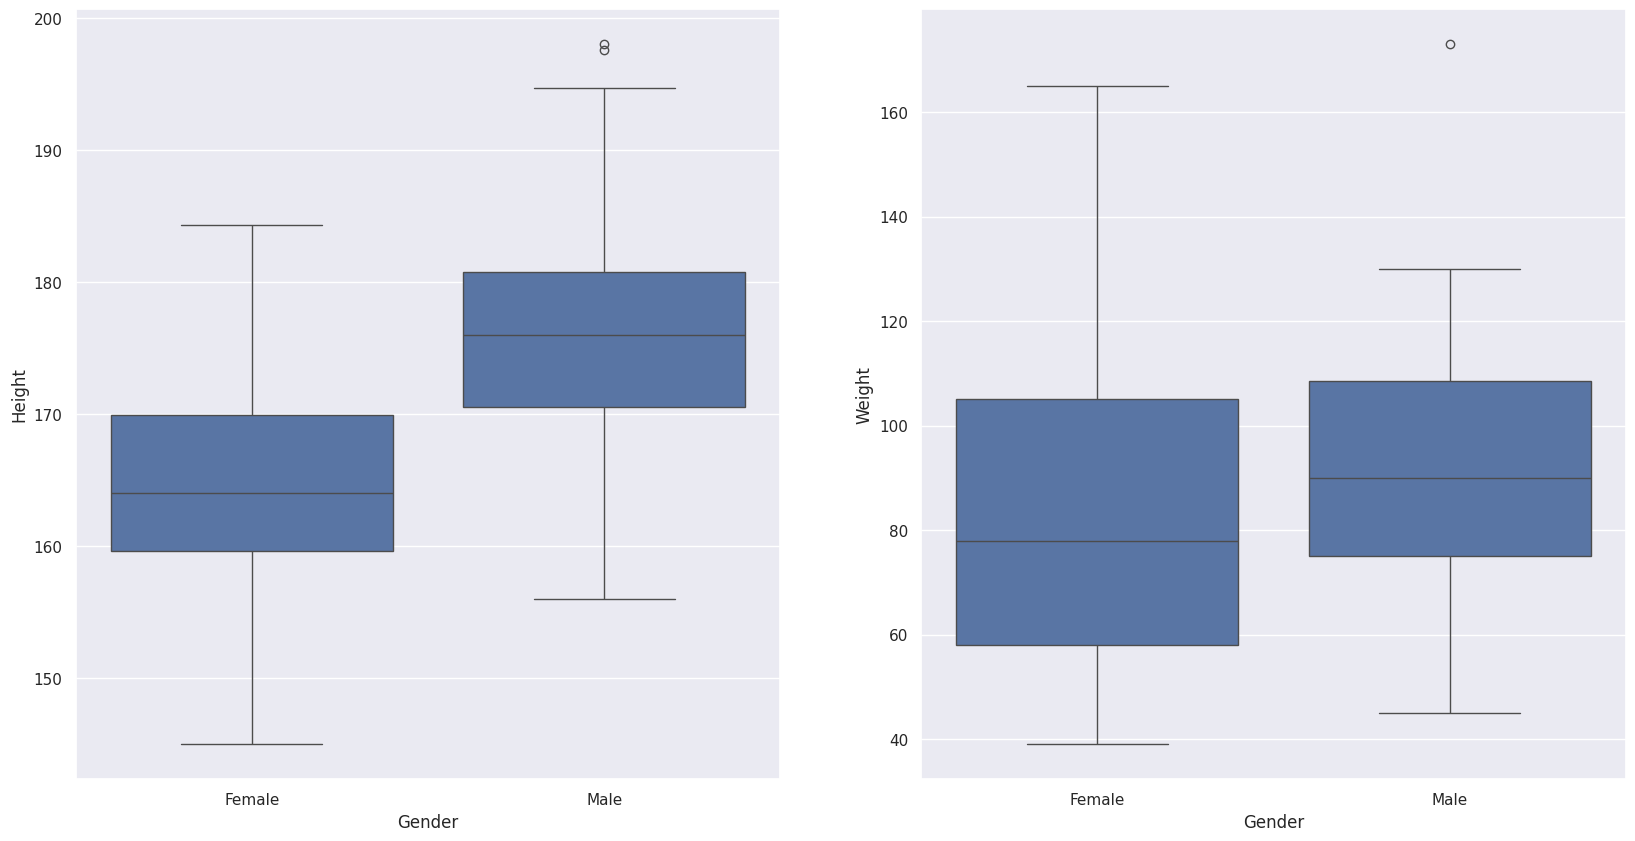

In [ ]:
# Melihat distribusi dan outlier
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
# perbandingan tinggi badan
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
# perbandingan berat badan
sns.boxplot(x='Gender', y='Weight', data=df)

OBESITY

In [ ]:
# Menghitung jumlah kemunculan masing-masing label dalam kolom
c = Counter(df['Obesity'])
print(c)

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


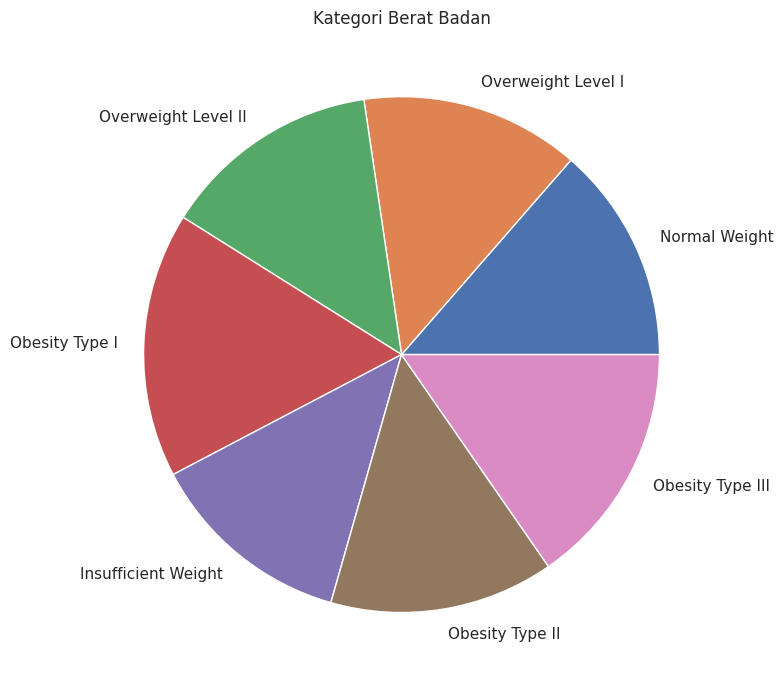

In [ ]:
# Menampilkan pie chart berdasarkan hasil Counter sebelumnya.
# Menunjukkan distribusi proporsi tiap kategori obesitas.
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Kategori Berat Badan')
plt.tight_layout()

Perbandingan tingkat obesitas antara Gemale dan Male

<ipython-input-23-335a8cbefb38>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, x="Obesity", hue="Gender", palette=sns.color_palette("Dark2"))


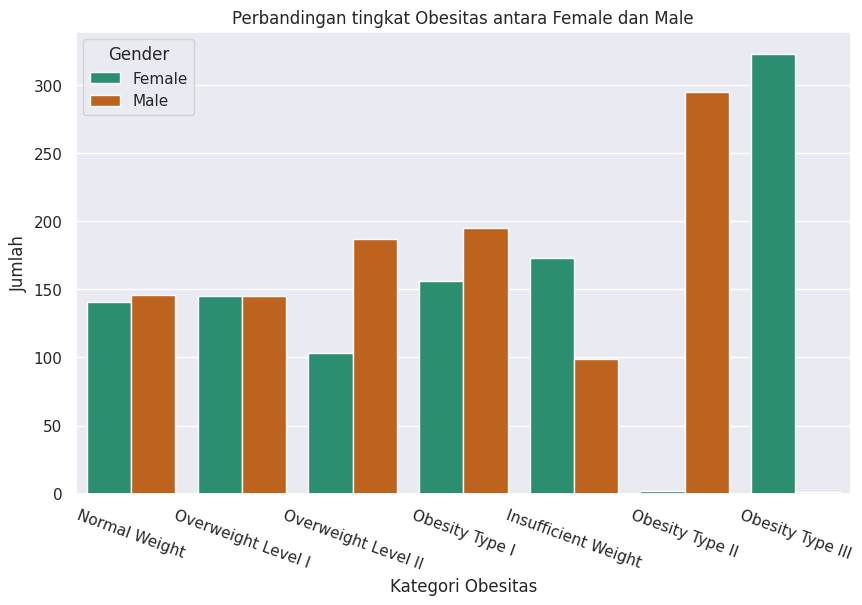

In [ ]:
# Membuat bar chart yang membandingkan jumlah individu per kategori obesitas, dibedakan berdasarkan gender.
# Rotasi label sumbu-X agar lebih terbaca.
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Obesity", hue="Gender", palette=sns.color_palette("Dark2"))
plt.xticks(rotation=-20)
plt.title("Perbandingan tingkat Obesitas antara Female dan Male")
plt.xlabel("Kategori Obesitas")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Untuk menghitung distribusi obesitas untuk male dan female
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(df.loc[~filt, 'Obesity'])
print(c_f)

Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Normal Weight': 146, 'Overweight Level I': 145, 'Insufficient Weight': 99, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 173, 'Obesity Type I': 156, 'Overweight Level I': 145, 'Normal Weight': 141, 'Overweight Level II': 103, 'Obesity Type II': 2})


Proporsi wanita dengan BMI yang lebih tinggi tercermin dari irisan besar Obesitas Tipe III pada diagram lingkaran di bawah ini, sementara Obesitas Tipe II adalah jenis obesitas yang paling umum terjadi. Menariknya, ada juga proporsi Berat Badan Tidak Cukup yang lebih tinggi pada wanita dibandingkan dengan pria, hal ini dapat dijelaskan oleh tekanan sosial yang lebih berat pada wanita untuk melakukan diet.

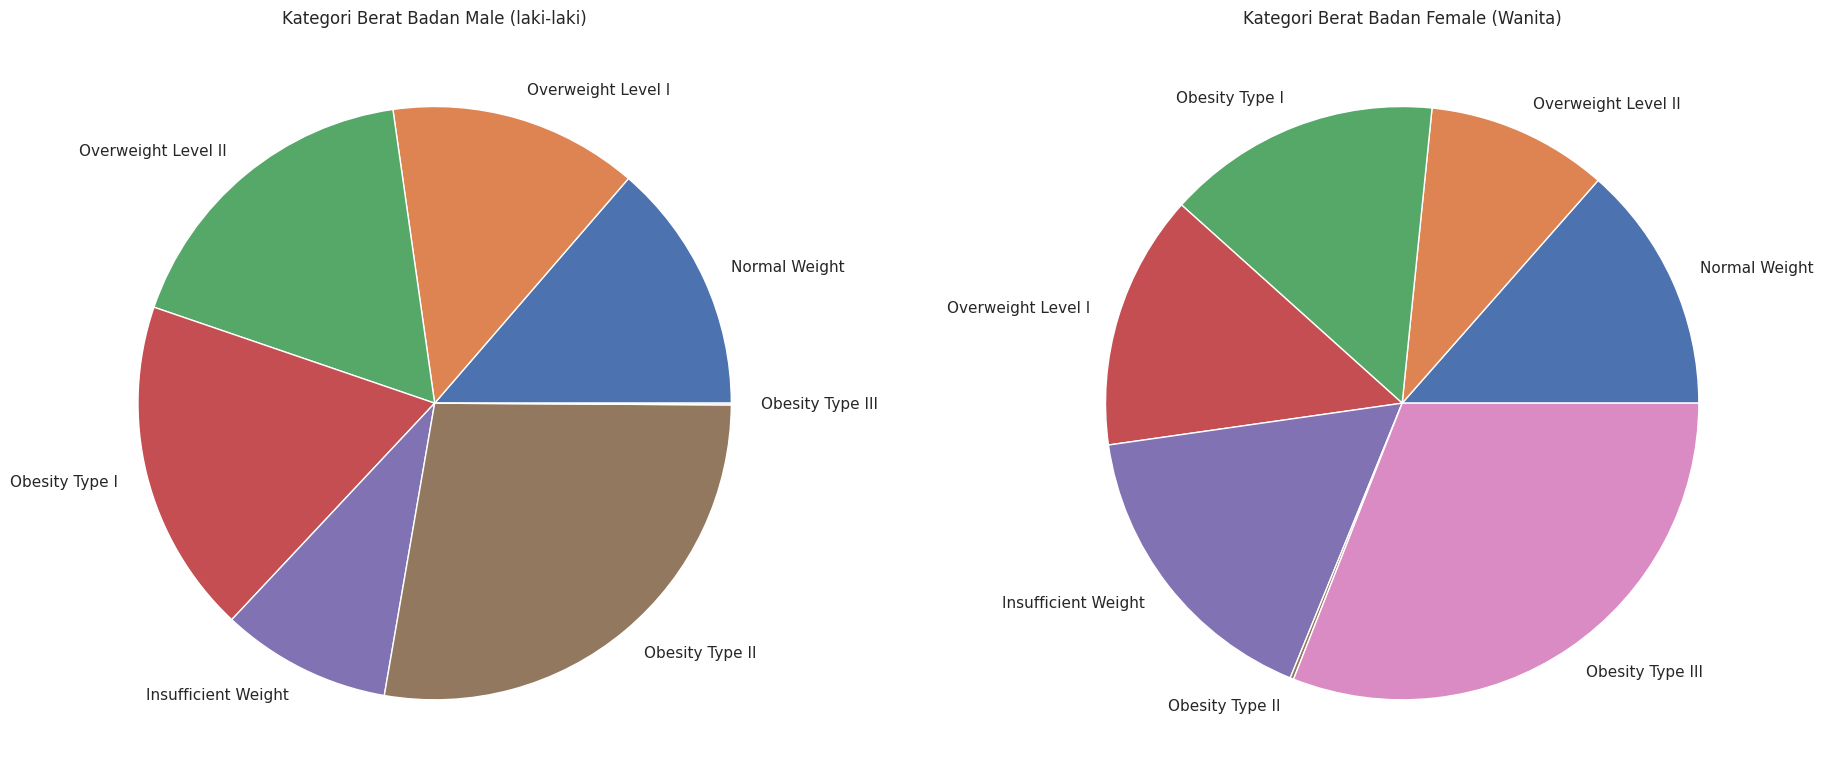

In [ ]:
# Membuat 2 pie untuk distribusi obesitas male dan female
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Kategori Berat Badan Male (laki-laki)')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Kategori Berat Badan Female (Wanita)')
plt.tight_layout()

Data Preprocessing Menggunakan Algoritma Random Forest

In [ ]:
# Import library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier          # Model Random Forest
from sklearn.model_selection import train_test_split         # Membagi data menjadi data latih dan uji
from sklearn.preprocessing import LabelEncoder               # Mengubah data kategorikal ke numerik
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluasi model
import pandas as pd

In [ ]:
# Salin DataFrame agar tidak mengubah data asli
df_rf = df.copy()

In [ ]:
# Perapihan Nama Kolom ===
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace(".", "", regex=False)
# Correct the column name from 'NObeyesdad' to 'Obesity'
df['Obesity'] = df['Obesity'].astype(str).str.replace(" ", "_")

In [ ]:
# Label encoding untuk semua kolom object
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Split Data
X = df.drop("Obesity", axis=1)
y = df["Obesity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model Random Forest dan latih dengan data training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 pohon keputusan
rf_model.fit(X_train, y_train)                 # Melatih model

RandomForestClassifier(random_state=42)

In [ ]:
# Lakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [ ]:
# Tampilkan hasil evaluasi model
print("Confusion Matrix:")                      # Matriks kesalahan
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")               # Precision, recall, f1-score
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")                      # Akurasi total model
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 1 56  0  0  0  5  0]
 [ 0  0 76  0  0  1  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  1  0  0  1 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.90      0.89        62
           2       0.97      0.97      0.97        78
           3       1.00      0.98      0.99        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.96      0.96      0.96        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423


Accuracy Score:
0.9527186761229315


In [ ]:
# Evaluasi Per Gender ===
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = y_pred
X_test_copy['Gender'] = df.loc[X_test.index, 'Gender']

print("\nAkurasi berdasarkan Gender:")
for gender_code in X_test_copy['Gender'].unique():
    subset = X_test_copy[X_test_copy['Gender'] == gender_code]
    acc = accuracy_score(subset['Actual'], subset['Predicted'])
    gender_label = 'Male' if gender_code == 1 else 'Female'
    print(f"{gender_label}: {acc:.2f}")


Akurasi berdasarkan Gender:
Female: 0.93
Male: 0.97


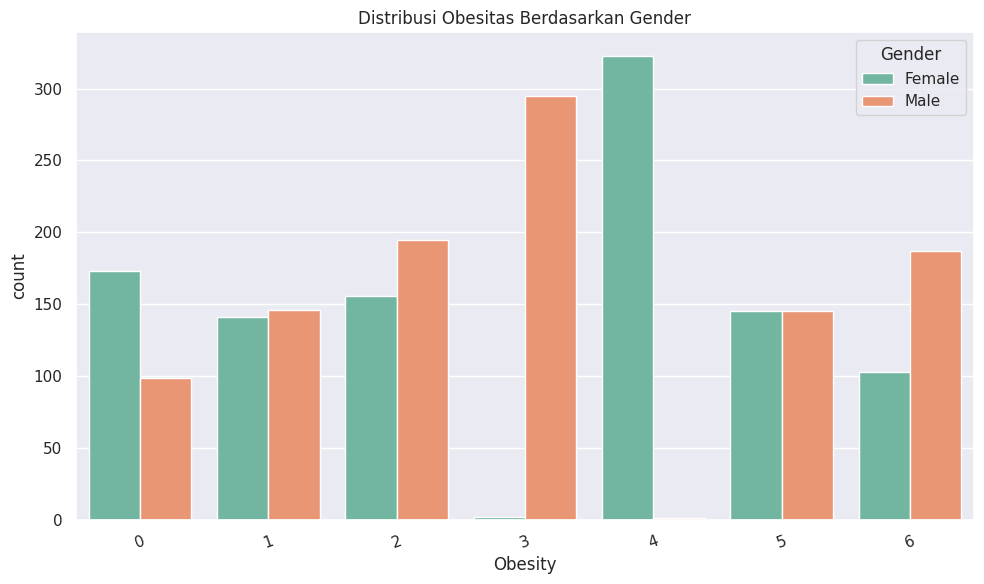

In [ ]:
# Visualisasi Distribusi Obesitas Berdasarkan Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Obesity", hue="Gender", palette="Set2")
plt.title("Distribusi Obesitas Berdasarkan Gender")
plt.xticks(rotation=20)
plt.legend(title="Gender", labels=["Female", "Male"])
plt.tight_layout()
plt.show()

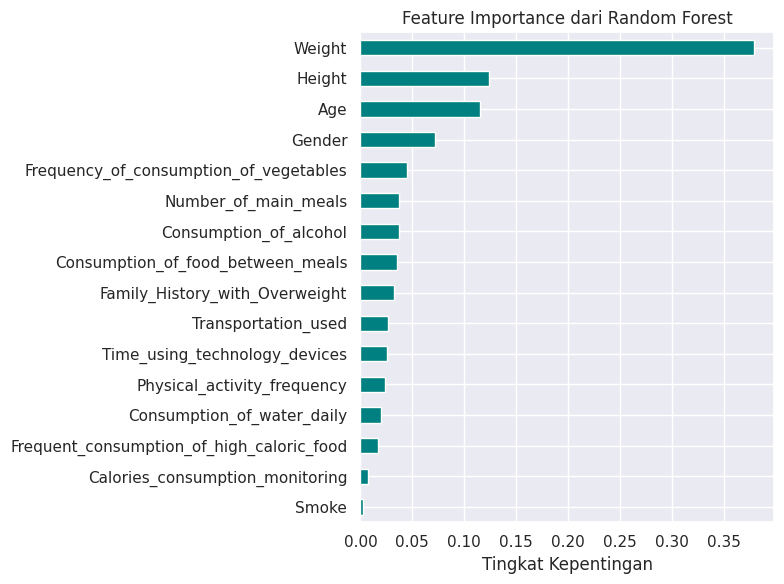

In [ ]:
# Feature Importance
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)
plt.figure(figsize=(8, 6))
feat_importances.plot(kind='barh', color='teal')
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Tingkat Kepentingan")
plt.tight_layout()
plt.show()